# Context
With the rise of the popularity of machine learning, this is a good opportunity to share a wide database of the even more popular video-game Pokémon by Nintendo, Game freak, and Creatures, originally released in 1996.


Pokémon started as a Role Playing Game (RPG), but due to its increasing popularity, its owners ended up producing many TV series, manga comics, and so on, as well as other types of video-games (like the famous Pokémon Go!).


This dataset is focused on the stats and features of the Pokémon in the RPGs. Until now (08/01/2017) seven generations of Pokémon have been published. All in all, this dataset does not include the data corresponding to the last generation, since 1) I created the databased when the seventh generation was not released yet, and 2) this database is a modification+extension of the database "721 Pokemon with stats" by Alberto Barradas (https://www.kaggle.com/abcsds/pokemon), which does not include (of course) the latest generation either.

# Content
This database includes 21 variables per each of the 721 Pokémon of the first six generations, plus the Pokémon ID and its name. These variables are briefly described next:

- Number. Pokémon ID in the Pokédex.
- Name. Name of the Pokémon.
- Type_1. Primary type.
- Type_2. Second type, in case the Pokémon has it.
- Total. Sum of all the base stats (Health Points, Attack, Defense, Special Attack, Special Defense, and Speed).
- HP. Base Health Points.
- Attack. Base Attack.
- Defense. Base Defense.
- Sp_Atk. Base Special Attack.
- Sp_Def. Base Special Defense.
- Speed. Base Speed.
- Generation. Number of the generation when the Pokémon was introduced.
- isLegendary. Boolean that indicates whether the Pokémon is Legendary or not.
- Color. Color of the Pokémon according to the Pokédex.
- hasGender. Boolean that indicates if the Pokémon can be classified as female or male.
- Pr_male. In case the Pokémon has Gender, the probability of its being male. The probability of being female is, of course, 1 minus this value.
- Egg_Group_1. Egg Group of the Pokémon.
- Egg_Group_2. Second Egg Group of the Pokémon, in case it has two.
- hasMegaEvolution. Boolean that indicates whether the Pokémon is able to Mega-evolve or not.
- Height_m. Height of the Pokémon, in meters.
- Weight_kg. Weight of the Pokémon, in kilograms.
- Catch_Rate. Catch Rate.
- Body_Style. Body Style of the Pokémon according to the Pokédex.

## Notes
Please note that many Pokémon are multi-form, and also some of them can Mega-evolve. I wanted to keep the structure of the dataset as simple and general as possible, as well as the Number variable (the ID of the Pokémon) unique. Hence, in the cases of the multi-form Pokémon, or the ones capable of Mega-evolve, I just chose one of the forms, the one I (and my brother) considered the standard and/or the most common. The specific choice for each of this Pokémon are shown below:

Mega-Evolutions are not considered as Pokémon.
- Kyogre, Groudon. Primal forms not considered.
- Deoxis. Only normal form considered.
- Wormadam. Only plant form considered.
- Rotom. Only normal form considered, the one with types Electric and Ghost.
- Giratina. Origin form considered.
- Shaymin. Land form considered.
- Darmanitan. Standard mode considered.
- Tornadus, Thundurus, Landorus. Incarnate form considered.
- Kyurem. Normal form considered, not white or black forms.
- Meloetta. Aria form considered.
- Mewstic. Both female and male forms are equal in the considered variables.
- Aegislash. Shield form considered.
- Pumpkaboo, Gourgeist. Average size considered.
- Zygarde. 50% form considered.
- Hoopa. Confined form considered.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('pokemon_alopez247.csv')
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [3]:
TotalAtt = df.iloc[:,[4,6]].values
#TotalHP = df.iloc[:, [4,5]].values

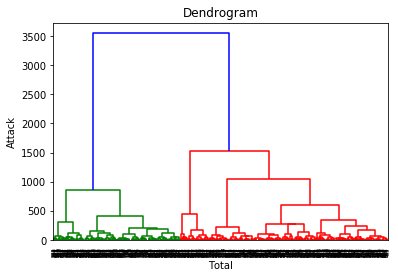

In [4]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(TotalAtt, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Total')
plt.ylabel('Attack')
plt.show()

In [5]:
# Fitting hierarchial clustering to the mall dataset 
from sklearn.cluster import AgglomerativeClustering
# affinity = type of distance to do linkage
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
# fit_predict(X) = Performs clustering on X and returns cluster labels.
TotalAtt_hc = hc.fit_predict(TotalAtt)

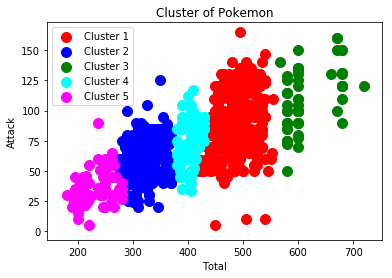

In [6]:
# Visualising the clusters
# Graph clusters
# plt.scatter(x = Annual Income,y = Spending Score,s = size, c = color, label = 'whatever you want')
plt.scatter(TotalAtt[TotalAtt_hc == 0,0], TotalAtt[TotalAtt_hc == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(TotalAtt[TotalAtt_hc == 1,0], TotalAtt[TotalAtt_hc == 1,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(TotalAtt[TotalAtt_hc == 2,0], TotalAtt[TotalAtt_hc == 2,1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(TotalAtt[TotalAtt_hc == 3,0], TotalAtt[TotalAtt_hc == 3,1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(TotalAtt[TotalAtt_hc == 4,0], TotalAtt[TotalAtt_hc == 4,1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Cluster of Pokemon')
plt.xlabel('Total')
plt.ylabel('Attack')
plt.legend()
plt.show()

Pokemon with higher total tend to have higher attack

Use one-hot-encoding from sckit-learn to numerate the types. Then use k-means clustering with numerated types and attack power

In [7]:
# Find number of unique types for encoding
len(df['Type_1'].unique())

18

In [8]:
# changed the types
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.iloc[:,2] = le.fit_transform(df.iloc[:, 2].values)

In [9]:
TypeAtt = df.iloc[:,[2,6]].values

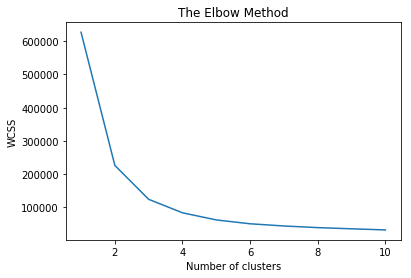

In [10]:
#find optimal number of clusters
from sklearn.cluster import KMeans
#within cluster sum of squares
wcss = []
# init = initialization method 
# max_iter = maximum number of iterations to find final cluster when kmeans algo is running
# n_init = number of times the kmeans algo run with different centroid
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(TypeAtt)
    # kmeans.inertia helps compute the sum 
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
# Applying k-means in the mall dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
# fit_predict() = Compute cluster centers and predict cluster index for each sample.
TypeAtt_kmeans = kmeans.fit_predict(TypeAtt)

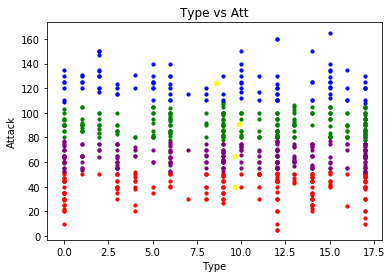

In [12]:
# Graph clusters
# plt.scatter(x = Annual Income,y = Spending Score,s = size, c = color, label = 'whatever you want')
plt.scatter(TypeAtt[TypeAtt_kmeans == 0,0], TypeAtt[TypeAtt_kmeans == 0,1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(TypeAtt[TypeAtt_kmeans == 1,0], TypeAtt[TypeAtt_kmeans == 1,1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(TypeAtt[TypeAtt_kmeans == 2,0], TypeAtt[TypeAtt_kmeans == 2,1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(TypeAtt[TypeAtt_kmeans == 3,0], TypeAtt[TypeAtt_kmeans == 3,1], s = 10, c = 'purple', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 20, c = 'yellow', label = 'Centroids')
plt.title('Type vs Att')
plt.xlabel('Type')
plt.ylabel('Attack')
plt.show()

Acknowledgements

As said at the beginning, this database was based on the Kaggle database "721 Pokemon with stats" by Alberto Barradas (https://www.kaggle.com/abcsds/pokemon). The other resources I mainly used are listed below:

WikiDex (http://es.pokemon.wikia.com/wiki/WikiDex).

Bulbapedia, the community driven Pokémon encyclopedia (http://bulbapedia.bulbagarden.net/wiki/Main_Page).

Smogon University (http://www.smogon.com/).

Possible future work
This dataset can be used with different objectives, such as, Pokémon clustering, trying to find relations or dependencies between the variables, and also for supervised classification purposes, where the class could be the Primary Type, but also many of the other variables.

Author
Asier López Zorrilla